# 3. 평가

**성능 평가 지표**(Evaluation Metric) : 모델이 분류냐 회귀냐에 따라 여러 종류로 나뉨  
- **회귀** : 대부분 실제값과 예측값의 오차 평균값에 기반함  
Ex. 오차에 절댓값을 씌운 뒤 평균 오차를 구하거나 오차의 제곱 값에 루트를 씌운 뒤 평균 오차를 구하는 방법과 같이 기본적으로 예측 오차를 가지고 정규화 수준을 재공하는 방법
- **분류** : 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반  
→ 정확도만을 가지고 판단했다가는 잘못된 평가 결과에 빠질 수 있음

**< 분류의 성능 평가 지표 >**
- 정확도 (Accuracy)
- 오차행렬 (Confusion Matrix)
- 정밀도 (Precision)
- 재현율 (Recall)
- F1 스코어
- ROC AUC  
  
→ 분류의 성능 지표 = 이진/멀티 분류 모두 적용되는 지표. But **이진 분류에서 더욱 중요하게 강조하는 지표**

**< 분류 >**
- 이진 분류 : 결정 클래스 값 종류의 유형에 따라 긍정/부정과 같은 **2개**의 결괏값만을 가짐
- 멀티분류 : **여러 개**의 결정 클래스 값을 가짐

## 3.1 정확도(Accuracy)

**정확도** : 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표  
→ 정확도 = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수  
→ **이진 분류**의 경우, 데이터 구성에 따라 머신러닝 모델의 성능 왜곡 가능하므로 정확도 수치 하나만 가지고 성능 평가하지 않음


In [3]:
import sklearn

print(sklearn.__version__)

1.2.2


사이킷런의 BaseEstimator 클래스를 상속받아 **아무런 학습을 하지 않고**, 성별에 따라 생존자를 예측하는 단순한 Classifier를 생성

In [4]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit( ) 메소드는 아무것도 학습하지 않음. 
    def fit(self, X , y=None):
        pass
    
    # predict( ) 메소드는 단순히 Sex feature가 1 이면 0, 그렇지 않으면 1로 예측함. 
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred

**데이터를 가공하고 나서** 이 Classifier를 이용해 학습/예측/평가를 적용

In [5]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [6]:
# 구글 드라이브와 연결
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('/content/drive/My Drive/CUAI_BASIC/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df,
                                                  test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행.
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


**단순한 알고리즘**으로 예측을 하더라도 데이터의 구성에 따라 정확도 결과는 약 78.77%로 **꽤 높은 수치가 나올 수 있기에** 정확도를 평가 지표로 사용할 때는 매우 신중해야 함

- 정확도는 **불균형한(imbalanced)** 레이블 값 분포에서 머신러닝 모델의 성능을 판단할 경우, 적합한 평가 지표가 아님  
  
※ **정확도 평가 지표의 맹점** : 아무 것도 하지 않고 무조건 특정한 결과로 찍어도 데이터 분포도가 균일하지 않은 경우 높은 수치가 나타날 수 있는 것

- MNIST 데이터셋을 multi classification에서 binary classification으로 변경

In [8]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [9]:
digits.target == 7                  # 레이블 값이 7인 것만 True, 나머지 값은 모두 False로 변환 → 전체 데이터의 10%만 True, 나머지 90%는 False인 불균형한 데이터 세트로 변형

array([False, False, False, ..., False, False, False])

In [10]:
# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환. 
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [11]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))     # 불균형한 데이터 세트에 모든 데이터를 False → 0으로 예측하는 classifier를 이용해 정확도를 측정하면 약 90%에 가까운 예측 정확도를 나타냄

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


predict( )의 결과를 np.zeros( )로 모두 0 값으로 반환함에도 불구하고 450개의 테스트 데이터 세트에 수행한 예측 정확도는 90%  
→ 정확도 평가 지표는 **불균형한** 레이블 데이터 세트에서는 **성능 수치로 사용돼서는 안됨**

## 3.2 오차 행렬

- **오차행렬(혼동행렬)** : 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지도 함께 보여주는 지표  
→ 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지 함께 나타내는 지표

- **True/False** : 예측값과 실제값이 **'같은가/틀린가'**를 의미
- **Negative/Positive** : 예측 결과 값이 부정(0)/긍정(1)을 의미
  
1. **TN**(True Negative) : 예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0
2. **FP**(False Positive) : 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0
3. **FN**(False Negative) : 예측값을 Negative 값 0으로 예측했는데 실제 값 Positive 값 1
4. **TP**(True Positive) : 예측값을 Positive 값 1로 예측했는데 실제 값 역시 Positive 값 1

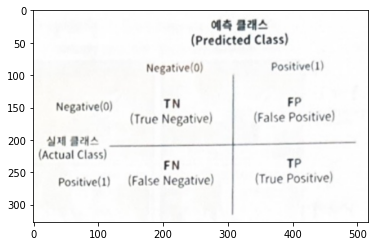

In [12]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/오차행렬.png')          # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

- **confusion_matrix( ) API** : 오차 행렬을 구하기 위해 사이킷런에서 제공

In [13]:
from sklearn.metrics import confusion_matrix

# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix 출력
confusion_matrix(y_test , fakepred)                 # 출력된 오차행렬 = ndarray 형태

array([[405,   0],
       [ 45,   0]])

1. **TN**(True Negative) : array[0,0] = 405 ← 전체 450건 데이터 중 무조건 Negative 0으로 예측해 True가 된 결과 405건
2. **FP**(False Positive) : array[0,1] = 0 ← Positive 1로 예측한 건수가 없으므로 0건
3. **FN**(False Negative) : array[1,0] = 45 ← Positive 1인 건수 45건을 Negative로 예측해 False가 된 결과 45건
4. **TP**(True Positive) : array[1,1] = 0 ← Positive 1로 예측한 건수가 없으므로 0건  
  
→ 정확도는 예측값과 실제 값이 얼마나 동일한가에 대한 비율만으로 결정  
→ 오차 행렬에서 True에 해당하는 값인 TN과 TP에 좌우됨

**정확도** = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 = **(TN + TP) / (TN + FP + FN + TP)**

불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중에서 중점적으로 찾아야 하는 매우 적은 수의 결괏값에 Positive를 설정해 1값을 부여하고, 그렇지 않은 경우는 Negative로 0값을 부여하는 경우가 대다수  
  
→ 불균형한 이진 분류 데이터 세트에서는 Positive 데이터 건수가 매우 작기 때문에 데이터에 기반한 머신러닝 알고리즘은 **Positive보다는 Negative로 예측 정확도가 높아지는 경향**  
= **정확도 지표**는 비대칭한 데이터 세트에서 Positive에 대한 예측 정확도를 판단하지 못한 채 **Negative에 대한 예측 정확도만으로도** 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류를 일으킴

## 3.3 정밀도와 재현율

- **정밀도, 재현율** : Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
1. **정밀도** : 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율     
→ TP / (FP + TP)
  
- 분모 (FP + TP) : 예측을 Positive로 한 모든 데이터 건수
- 분자 (TP) : 예측과 실제 값이 Positive로 일치한 데이터 건수
  
※ Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 **양성 예측도**라고도 불림
  
2. **재현율** : 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율  
→ TP / (FN + TP) 
  
- 분모 (FN + TP) : 실제 값이 Positive인 모든 데이터 건수
- 분자 (TP) : 예측과 실제 값이 Positive로 일치한 데이터 건수
  
※ 민감도(Sensitivity) 또는 TPR(True Positive Rate)라고도 불림
  

**MyFakeClassifier**의 예측 결과로 정밀도와 재현율 측정  
→ MyFakeClassifier는 Positive로 예측한 TP 값이 하나도 없기 때문에 **정밀도와 재현율 값이 모두 0**

In [14]:
from sklearn.metrics import accuracy_score, precision_score , recall_score

print("정밀도:", precision_score(y_test, fakepred))
print("재현율:", recall_score(y_test, fakepred))

정밀도: 0.0
재현율: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- **재현율이 상대적으로 더 중요한 지표인 경우** : 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
- **정밀도가 상대적으로 더 중요한 지표인 경우** : 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우

- 재현율과 정밀도 **모두 TP를 높이는 데** 동일하게 초점을 맞추지만, **재현율**은 **FN(실제 Positive, 예측 Negative)를 낮추는 데**, **정밀도**는 **FP를 낮추는데** 초점을 맞춤   
  
→ 서로 보완적인 지표로 분류의 성능을 평가하는 데 적용  
→ 가장 좋은 성능 평가 : **재현율과 정밀도 모두 높은 수치 얻는 것** = 둘 중 어느 하나만 높고 다른 하나는 낮은 경우는 바람직하지 않음

- **precision_score( )** : **정밀도** 계산
- **recall_score( )** : **재현율** 계산
- **get_clf_eval( )** : **오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성**

In [15]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

로지스틱 회귀 기반으로 타이타닉 생존자를 예측하고 confusion matrix, accuracy,  precision, recall 평가를 수행

- solver='**liblinear**' : 로지스틱 회귀의 최적화 알고리즘 유형을 지정하는 것 → 보통 작은 데이터 세트의 이진 분류인 경우 적합   
(기본 값 : lbfgs → 데이터 세트가 상대적으로 크고 다중 분류인 경우 적합)

In [16]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('/content/drive/My Drive/CUAI_BASIC/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')                                         # solver='liblinear'는 로지스틱 회귀의 최적화 알고리즘 유형을 지정하는 것

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


### 정밀도/재현율 트레이드오프

- **정밀도/재현율 트레이드오프** : 정밀도와 재현율은 **상호 보완적인** 평가 지표이므로 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어질 수 있음

일반적으로 이진 분류에서는 이 임계값을 0.5, 즉 50%로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정
- **predict_proba( )** : 개별 데이터별로 예측 확률을 반환하는 메서드  
→ **입력 파라미터** : predict( ) 메서드와 동일하게 보통 테스트 피처 데이터 세트를 입력  
→ **반환값** : 개별 클래스의 예측 확률을 ndarray m x n (m : 입력값의 레코드 수, n : 클래스 값 유형) 형태로 반환  
입력 테스트 데이터 세트의 표본 개수가 100개이고 예측 클래스 값 유형이 2개(이진 분류)라면 반환값은 100 x 2 ndarray.  
각 열은 개별 클래스의 예측 확률. 이진 분류에서 첫 번째 칼럼은 O Negative의 확률, 두 번째 칼럼은 1 Postive의 확률

**predict_proba( ) 메소드 확인**

In [17]:
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


- 반환 결과인 ndarray는 0과 1에 대한 확률을 나타내므로 첫 번째 칼럼 값과 두 번째 칼럼 값을 더하면 1이 됨    
- 두 개의 칼럼 중에서 더 큰 확률값으로 predict() 메서드가 최종 예측

- **predict( )** : predict_proba( ) 호출 결과로 반환된 배열에서 분류 결정 임계값보다 큰 값이 들어 있는 칼럼의 위치 (첫 번째 칼럼 또는 두 번째 칼럼)를 받아서 최종적으로 예측 클래스를 결정하는 API

**Binarizer** 활용                                                            
: predict( )는 predict_proba( ) 메서드가 반환하는 확률 값을 가진 ndarray에서 정해진 임곗값(0.5)을 만족하는 ndarray의 칼럼 위치를 최종 예측 클래스로 결정

In [18]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값(1.1)보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


분류 결정 임계값 **0.5** 기반에서 **Binarizer**를 이용하여 예측값 변환

In [19]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


- 로지스틱 회귀 Classifier 객체에서 호출된 predict( )로 계산된 지표 값과 정확히 같음 = predict()가 predict_proba( )에 기반함

분류 결정 임계값 **0.4** 기반에서 **Binarizer**를 이용하여 예측값 변환

In [20]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤  
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


- 임곗값을 낮추면 True 값이 많아지게 되며 재현율 값이 올라가고 정밀도가 떨어짐  
→ **분류 결정 임곗값** : Positive 예측값을 결정하는 확률의 기준이 됨

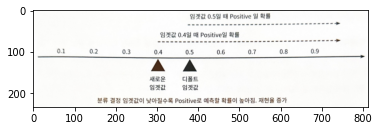

In [21]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/Binarizer.png')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

**Positive 예측값이 많아지면** 상대적으로 **재현율** 값이 **높아짐**


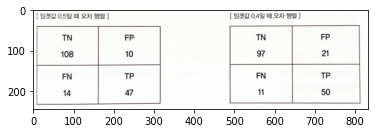

In [22]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/임계값오차행렬.png')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                               # 읽어온 이미지 표시
plt.show()

임곗값이 0.5에서 0.4 로 낮아지면서 TP가 47에서 50으로 늘었고 FN이 14에서 11로 줄음. 그에 따라 재현율이 0.770에서 0.820 으로 좋아짐.  
하지만 FP는 10에서 21로 늘면서 정밀도가 0.825에서 0.704로 많이 나빠짐. 그리고 정확도도 0.866에서 0.821로 나빠짐

여러개의 분류 결정 임곗값을 변경하면서 **Binarizer**를 이용하여 예측값 변환
→ 임곗값을 0.4에서부터 0.6까지 0.05씩 증가시킴

In [23]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


임곗값이 0.45일 경우, 디폴트 0.5인 경우와 비교해 정확도는 동일, 정밀도는 약간 떨어졌으나 재현율이 오름

**precision_recall_curve( )** 를 이용하여 임곗값에 따른 정밀도-재현율 값 추출
- **입력 파라미터** 
1. **y_true** : 실제 클래스값 배열 (배열 크기 = [데이터 건수])
2. **probas_pred** : Positive 컬럼의 예측 확률 배열 (배열의 크기 = [데이터 건수])
- **반환값**
1. **정밀도** : 임곗값별 정밀도 값을 배열로 반환
2. **재현율** : 임곗값별 재현율 값을 배열로 반환


In [24]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]                                  # predict_proba()의 반환 ndarray의 두 번째 컬럼(컬럼 인덱스 1)값에 해당하는 데이터 세트 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (165,)
반환된 precisions 배열의 Shape: (166,)
반환된 recalls 배열의 Shape: (166,)
thresholds 5 sample: [0.01974988 0.06956414 0.08402808 0.08474207 0.08920161]
precisions 5 sample: [0.34078212 0.34269663 0.34463277 0.34659091 0.34857143]
recalls 5 sample: [1. 1. 1. 1. 1.]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값:  [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임계값별 정밀도:  [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값별 재현율:  [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


-  임셋값이 증가할수록 정밀도 값은 동시에 높아지나 재현율 값은 낮아짐

임곗값의 변경에 따른 정밀도 & 재현율 변화 곡선을 그림

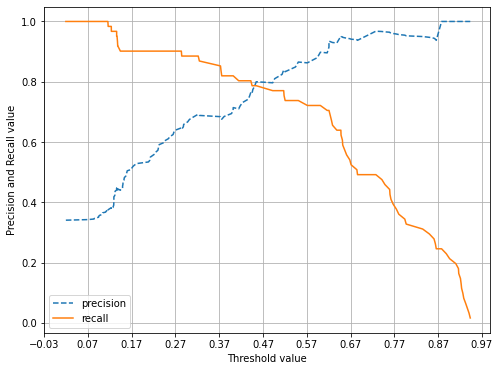

In [25]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

**임곗값이 낮을수록**, 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아짐  
↔ 임곗값을 계속 증가시킬수록 재현율 값이 낮아지고 정밀도 값이 높아지는 반대의 양상이 됩니다

임곗값이 약 0.45 지점에서 재현율과 정밀도가 비슷해짐

### 정밀도와 재현율의 맹점

: Positive 예측의 임곗값을 변경함에 따라 정밀도와 재현율의 수치가 변경됨
- 단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용되서는 안 됨

- 정밀도가 100% 되는 법  
: 확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측

- 재현율이 100%가 되는 법  
: 모든 대상을 Positive로 예측

정밀도와 재현율의 수치가 적절하게 조합돼 분류의 종합적인 성능 평가에 사용될 수 있는 평가 지표가 필요함

## 3.4 F1 스코어

- **F1 스코어** : 정밀도와 재현율을 결합한 지표  
→ 정밀도와 재현율이 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐  
→ **F1 = 2 / (1/recall + 1/precision) = 2 x ((precision x recall) / (precision + recall))**  
→ **f1_score( )** : F1 스코어를 구하기 위한 API

In [26]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7966


타이타닉 생존자 예측에서 임곗값을 변화시키면서 F1 스코어를 포함한 평가 지표를 구하기


In [27]:
# get_clf_eval( ) 함수에 F1 스코어를 구하는 로직 추가가 
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1:0.7576
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1:0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1:0.7966
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1:0.7965
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1:0.8000


 F1 스코어는 임겟값이 0.6일 때 가장 좋은 값을 보여줌.  
하지만 임계값이 0.6인 경우에는 재현율이 크게 감소하고 있음

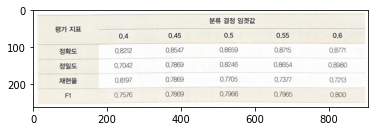

In [28]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/f1스코어.png')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

## 3.5 ROC 곡선과 AUC

- **ROC 곡선(Receiver Operation Characteristic Curve)** : 수신자 판단 곡선  
→ 머신러닝의 이진 분류 모델의 예측 성능 판단하는 중요한 평가 지표  
→ FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선  
→ FPR을 X축으로, TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변호가 **곡선형태**로 나타남

- **민감도(TPR)** : 실제값 Positive(양성)가 정확히 예측돼야 하는 수준  
(질병이 있는 사람은 질병이 있는 것으
로 양성 판정)  
→ TPR = TP / (FN + TP)

- **특이성(TNR)** : 실제값 Negative(음성)가 정확히 예측돼야 하는 수준  
(질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정)  
→ TNR = TN / (FP + TN)

- ROC 곡선의 X축 기준인 **FPR(False Positive Rate)**   
= FP / (FP + TN) = 1 - TNR = 1 - 특이성 

-  ROC 곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것이며, 멀어질수록 성능이 뛰어난 것

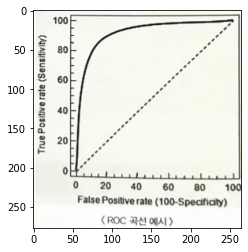

In [29]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/My Drive/CUAI_BASIC/ROC.png')         # 이미지 읽어오기(적절한 경로를 설정해야 함)

plt.imshow(img)                                                          # 읽어온 이미지 표시
plt.show()

ROC 곡선 : FPR을 0부터 1까지 변경하면서 TPR의 변화 값을 구함  
- 분류 결정 임곗값 = Positive 예측값을 결정하는 확률의 기준 → 임곗값을 1로 변경 = FPR 값이 0이 됨  
- 임곗값을 0으로 지정 → 다 Positive로 예측하므로 TN 값이 0이 됨 → FPR 값이 1이 됨

**roc_curve( )** 를 이용하여 ROC 곡선을 구할 수 있음
- **입력 파라미터** 
1. **y_true** : 실제 클래스값 배열 (배열 크기 = [데이터 건수])
2. **y_score** : predict_proba( )의 반환 값 array에서 Positive 컬럼의 예측 확률이 보통 사용됨. array, shape = [n_samples]
- **반환값**
1. **fpr** : fpr 값을 array로 반환
2. **tpr** : tpr 값을 array로 반환
3. **thresholds** : threshold 값 array


In [30]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출. 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


임계값이 1에 가까운 값에서 점점 작아지면서 FPR이 점점 커짐. 그리고 FPR이 조금씩 커질 때 TPR은 가파르게 커짐.

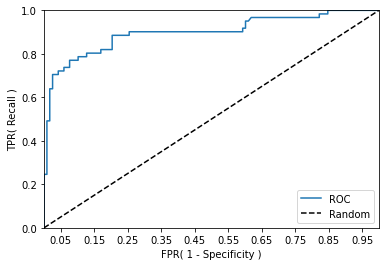

In [31]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

- **ROC 곡선** 자체 : FPR과 TPR의 변화 값을 보는 데 이용
- **AUC** 값 : 분류의 성능 지표로 사용되는 것 = ROC 곡선 밑의 면적을 구한 것   
→ 1에 가까울수록 좋은 수치  
→ AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건

In [32]:
from sklearn.metrics import roc_auc_score
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8987


타이타닉 생존자 예측에서 get_clf_eval() 함수는 정확도, 정밀도, 재현율, F1 스코어, ROC AUC 값까지 출력 가능

In [33]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

## 3.6 피마 인디언 당뇨병 예측

- 피마 인디언 당뇨병 데이터 세트 : 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터  
→ 전체 768개의 데이터 중에서 Negative 값 0이 500개, Positive 값 1이 268개로 Negative가 상대적으로 많음

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('/content/drive/My Drive/CUAI_BASIC/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


< 피마 인디언 당뇨병 데이터 세트 >
- Pregnancies : 임신 횟수
- Glucose : 포도당 부하 검사 수치
- Blood Pressure : 혈압 (mm Hg) 
- SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin : 혈청 인슐린 (mu U/ml)
- BMI : 체질량지수 (체중(kg)/(키(m))^2)
- DiabetesPedigreeFunction : 당뇨 내력 가중치 값
- Age : 나이
- Outcome : 클래스 결정 값 (0 또는 1)
  
→ Null 값은 없으며 피처의 타입은 모두 숫자형 / 별도의 피처 인코딩 필요 X

In [35]:
diabetes_data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [37]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [38]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출. 
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출 
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926,    F1: 0.6465, AUC:0.8083


예측 정확도 : 77.27%, 재현율 : 59.26%  
전체 데이터의 65%가 Negative이므로 정확도보다는 **재현율** 성능에 조금 더 초점을 맞춤

정밀도 재현율 곡선을 보고 임곗값별 정밀도와 재현율 값의 변화를 확인

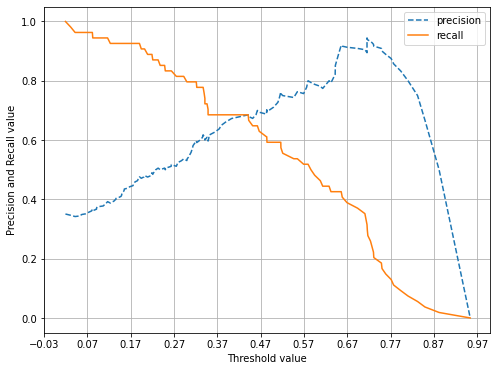

In [39]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

임곗값을 0.42 정도로 낮추면 정밀도와 재현율이 어느 정도 균형을 맞춤  
But 두 지표 모두 0.7이 안되는 수치

In [40]:
diabetes_data.describe()        # 피처 값의 분포도 확인

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


min( ) 값이 0으로 돼 있는 피처가 상당히 많음

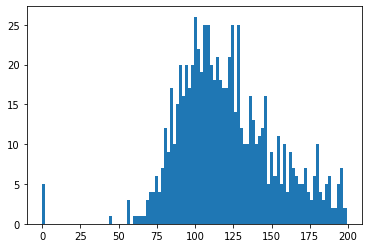

In [41]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()                                      # 0값으로 5개 존재

min( ) 값이 0으로 돼 있는 피처에 대해 0 값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인

In [42]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


SkinThickness와 Insulin의 0 값은 각각 전체의 29.56%, 48.7%로 많이 가짐  
전체 데이터 수가 많지 않음 → 피처의 0 값을 평균값으로 대체

In [43]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features)

0 값을 평균값으로 대체한 데이터 세트에 피처 스케일링을 적용해 변환

In [44]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8433


데이터 변환과 스케일링을 통해 성능 수치 일정 수준 개선  
But 재현율 수치는 개선 필요

In [45]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [46]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]                   # 임곗값을 0.3에서 0.5까지 0.03씩 변화시키면서 재현율과 다른 평가 지표의 값 변화 출력
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963,    F1: 0.6615, AUC:0.8433
임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778,    F1: 0.6774, AUC:0.8433
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222,    F1: 0.6667, AUC:0.8433
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037,    F1: 0.6667, AUC:0.8433
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667,    F1: 0.6792, AUC:0.8433
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667,    F1: 0.6857, AUC:0.8433
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,    F1: 0.6931, AUC:0.8433
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8433


- 정확도와 정밀도를 희생하고 재현율을 높이는 데 가장 좋은 임곗값 : 0.33 → 재현율 값 : 0.7963  
But 정밀도가 0.5972로 매우 저조한 극단적인 선택임  
→ **임계값 0.48**이 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 좋은 임계값

In [47]:
# 임곗값를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환. 
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 

get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])


오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481,    F1: 0.6931, AUC:0.8433
